In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
# excel verileri yavaş okunduğu için tekrar tekrar çalışmalar olursa diye cvs ye çevirelim
data = pd.read_excel(r"C:\Users\Kemalettin\Desktop\anlasekon\Python ile Veri analizi\Veri Önişleme Proje\data.xlsx")
data.to_csv(r"C:\Users\Kemalettin\Desktop\anlasekon\Python ile Veri analizi\Veri Önişleme Proje\data.csv")


In [48]:
data = pd.read_csv(r"C:\Users\Kemalettin\Desktop\anlasekon\Python ile Veri analizi\Veri Önişleme Proje\data.csv")
data2 = data.copy()
print(data2.head())

   Unnamed: 0 Invoice StockCode                          Description  \
0           0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1           1  536365     71053                  WHITE METAL LANTERN   
2           2  536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3           3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4           4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   

   Quantity          InvoiceDate  Price  Customer ID         Country  
0         6  2010-12-01 08:26:00   2.55      17850.0  United Kingdom  
1         6  2010-12-01 08:26:00   3.39      17850.0  United Kingdom  
2         8  2010-12-01 08:26:00   2.75      17850.0  United Kingdom  
3         6  2010-12-01 08:26:00   3.39      17850.0  United Kingdom  
4         6  2010-12-01 08:26:00   3.39      17850.0  United Kingdom  


In [49]:
data2.drop(data2.columns[[0]],axis=1,inplace=True)
data2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [50]:
# hocamızın önerisi daha hızlı ve iyi anlayarak çalışmak için sütun adlarının Türkçeye çevrilemesini öneriyor. 
data2.rename(columns={"Invoice":"Fatura","StockCode":"Stok kodu",'Description':"Ürün Adı", 'Quantity':"Adet", 'InvoiceDate':"Fatura Tarihi"
                      ,'Price':"Fiyat", 'Customer ID':"Müşteri ID", 'Country':"Ülke"},inplace=True)
                       # sözlük tipinde karşılaştırmalı vererek yapmamız lazım 
data2.head()

,Fatura,Stok kodu,Ürün Adı,Adet,Fatura Tarihi,Fiyat,Müşteri ID,Ülke
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [51]:
# Yaptığımız çalışma araştırma artık her ne ise ona göre çalışmamız gerek bu minvalde bazı veri tipleri veya verinin kendisi işimize yaramayabilir
# Bunları kaldırmak bizim için hem hızlı olacak hem de  daha efektif çalışmamızı sağlayabilir. 
# Veri üzerinden ekstra olarak farklı sütunlar kullanılarak oluşturulabilecek yeni bilgiler varsa onları da oluşturarak işe yarar toplu bilgi
# elde edebiliriz. 
data2.info() # info fonksiyonu ile veri kümemiz hakkında bilgi alabiliriz karakterler non null sayıları vs.
# Buna göre mesela tarihi datetime objesi yapabiliriz ileride üzerinde çalışmamız gerekirse kullanırız
# Müşteri ID işimize yaramaz silebiliriz. Şimdilik bu kadar görünüyor bunları yapalım 
data2["Fatura Tarihi"] = pd.to_datetime(data2["Fatura Tarihi"])
data2["Toplam Fiyat"] = data2["Fiyat"]*data2["Adet"]
data2.drop(data2[["Müşteri ID"]],axis=1,inplace=True) # data2.drop("Müşteri ID",axis=1,inplace=True) bu şekilde de çalışır.
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Fatura         541910 non-null  object 
 1   Stok kodu      541910 non-null  object 
 2   Ürün Adı       540456 non-null  object 
 3   Adet           541910 non-null  int64  
 4   Fatura Tarihi  541910 non-null  object 
 5   Fiyat          541910 non-null  float64
 6   Müşteri ID     406830 non-null  float64
 7   Ülke           541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Fatura         541910 non-null  object        
 1   Stok kodu      541910 non-null  object        
 2   Ürün Adı       540456 non-null  object        
 3   Ad

In [52]:
data2.head()
# Müşteri ID düşmüş ek olarak Toplam Fiyat istediğimiz şekilde oluşmuş ve güzel tarih datetime objesi olmuş o da iyi :D
# Evet şuanlık güzel bir düzenleme yapmışız.

,Fatura,Stok kodu,Ürün Adı,Adet,Fatura Tarihi,Fiyat,Ülke,Toplam Fiyat
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


In [53]:
# EKSİK GÖZLEM DEĞERLERİ - MİSSİNG VALUE 
print(data2.isnull().sum()) # sonuca göre Ürün adı kısmında 1454 tane eksik gözlemimiz var diğer sütunlarımızda bir eksik gözlem yok 


Fatura              0
Stok kodu           0
Ürün Adı         1454
Adet                0
Fatura Tarihi       0
Fiyat               0
Ülke                0
Toplam Fiyat        0
dtype: int64


In [54]:
# Ürün adı bir kategorik değişkendir bu değişkenleri doldurmak için iletişme geçilebilir ama velev ki sorunu normal bir şekilde 
# çözemedik yani fiyat eşleştirme ile yaptık ama aynı fiyattan onlarca var bir id yok vs. vs. bir şekilde başaramazsak 
# kategorik değişkenlerde eksik gözlemlerde eğer text biçimindeyse bu durumda doldurma işlemini mod değerine göre yaparız. 
#data2["Ürün Adı"].fillna(data2["Ürün Adı"].mode()[0],inplace=True)
#print(data2.isnull().sum()) # hala dolmayan var mı yok mu kontrol edelim ve her hangi eksik değer kalmamış
# Tabi bu bir yol ve yukarıdaki şekilde çözülür ama genelde böyle durumlarda ilk olarak 
# orana bakılır yani eğer çok fazla verimiz var ise bunları en çok tekrar eden ile doldurmak en çok olanın sayısını arttırır bunun yerine bunları
# silmek bizim için daha iyi olacaktur 
kontrolOran = data2["Ürün Adı"].isnull().sum()/len(data2)
print(kontrolOran*100) # Sonuç yüzde 0.26831023601705084 bu çok az bir miktar o yüzden silmemiz daha iyi olacaktır. 
data2.dropna(axis=0,inplace=True) # sildik indeksler bozuldu onları resetleyelim
data2.reset_index(drop=True,inplace=True)
print(data2.isnull().sum())
# Sonuç yine aynı şekilde tüm eksik değerleri sildik ve indeksleri resetledik.

0.26831023601705084
Fatura           0
Stok kodu        0
Ürün Adı         0
Adet             0
Fatura Tarihi    0
Fiyat            0
Ülke             0
Toplam Fiyat     0
dtype: int64


In [55]:
# Şimdi bu nokta da şunu belirtmek gerekiyor. Çalıştığımız iş sektör veya datasetinin üzerinden bu bilgilere vakıf olmak 
# gerekiyor şuan kullandığımız dataseti https://archive.ics.uci.edu/dataset/502/online+retail+ii bu adreste mevcut 
# Aykırı değerlere geçmeden önce her hangi bir hatalı veri girişi var mı hata barındıran veri var mı bunları kontrol etmek gerekiyor.
"""
InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. 
StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 
Description: Product (item) name. Nominal. 
Quantity: The quantities of each product (item) per transaction. Numeric.	
InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated. 
UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£). 
CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. 
Country: Country name. Nominal. The name of the country where a customer resides.
"""
# Bu şekilde bilgiler verilmiş buna göre "If this code starts with the letter 'c', it indicates a cancellation. " denmiş yani iptal edilenler 
# içinde fatura kodu 'c' ile başlayanlar iptal edilmiş olanlar bunları belirleyelim kullanıp kullanmayacağımıza daha karar vermedik belki de 
# bunlar üzerinden bir istatistiki anlaiz yapılabilir mesela neden iptal ettiniz iptal etme kararında etkili olan şeyler ne 
# belki de ürünü aldım ama çalışanın kıyafeti kırmızıydı ve bu olumsuz düşünceye sebep oldu ve iptal ettim. 
# Veya bu iptal oranı nedir. 100 ürünün kaçında iptal etme işlemi oluyor vs. vs. vs. Neyse yorumlar bitmez şimdi tespit edelim
iptal = data2[data2["Fatura"].str.contains('C',na=False)] # filtreleme işlemi içinde c olanları getir dedik ve onları iptal diye sakladık
indeksler = [ i for i in iptal.index] # burada  da indekslerini saklayalım belki lazım olur. 
print(indeksler,len(indeksler),sep="\n") # 9288 ürün iptal edilmiş 
print((len(indeksler)/len(data2["Fatura"].index))*100) # yüzde 1.78 silerek devam edelim. 
data2.drop(data2.index[indeksler],inplace=True)
data2.reset_index(drop=True,inplace=True)
iptal2 = data2[data2["Fatura"].str.contains('C',na=False)]
print("Kontrol :",iptal2) # kontol amaçlı yaptığımızda boş bir dataframe dönmüş oldu



[141, 154, 235, 236, 237, 238, 239, 240, 241, 936, 1440, 1441, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 3160, 3328, 3399, 3683, 3887, 3888, 3909, 4258, 4278, 4296, 4297, 4824, 4825, 4841, 4842, 4843, 4844, 4845, 4846, 4864, 4865, 4866, 4867, 4868, 4869, 4870, 4871, 4872, 4873, 4874, 4892, 4893, 4894, 4895, 4919, 4920, 4925, 4926, 4927, 4928, 4929, 4930, 4931, 4932, 5220, 5221, 5222, 5223, 5224, 5247, 5248, 5249, 5250, 5251, 6769, 6770, 6771, 7224, 7395, 7396, 7397, 7478, 7479, 8274, 8275, 8276, 8277, 8278, 8279, 8643, 8910, 8996, 9451, 9452, 10152, 10162, 11460, 11461, 11462, 11463, 11464, 11465, 11466, 11467, 11468, 11469, 11470, 11471, 11472, 11473, 11474, 11475, 11476, 11477, 11478, 11479, 11757, 11758, 11771, 12357, 12408, 12493, 12494, 12495, 12778, 12900, 12901, 12902, 12903, 12904, 12905, 12963, 12964, 12965, 12966, 12973, 12974, 12996, 12997, 12998, 13008, 13009, 13216, 13970, 13971, 14272, 14273, 14274, 14375, 14376, 14377, 14437, 144

In [56]:
# A 6-digit integral number uniquely assigned to each transaction. 
# Buna göre hatalı işlemleri tespit edelim
hatalı = data2[(data2["Fatura"].str.len() != 6) | (~data2["Fatura"].str.isdigit())]
indeksliHata = [i for i in hatalı.index]
data2.drop(data2.index[indeksliHata],inplace=True)
data2.reset_index(drop=True,inplace=True)
hatalı2 = data2[(data2["Fatura"].str.len() != 6) | (~data2["Fatura"].str.isdigit())]
print("Kontrol :",len(hatalı2)) # hatalı ürün kalmadı artık 

Kontrol : 0


In [57]:
# StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.  
# Stok kodunda hatalı ürünleri yakalayalım
hatalıStokKod = data2[(data2["Stok kodu"].str.len() != 5) | (~data2["Stok kodu"].str.isdigit())]
hatalıStokKod # 53224 rows × 8 columns sıkıntılı 53 bin ürün hatalı kaydedilmiş 
# story kısmını geçtik :)) 
indeksHatalıStokKod = [i for i in hatalıStokKod.index]
data2.drop(data2.index[indeksHatalıStokKod],inplace=True)
data2.reset_index(drop=True,inplace=True)
hatalıStokKodKontrol = data2[(data2["Stok kodu"].str.len() != 5) | (~data2["Stok kodu"].str.isdigit())]
hatalıStokKodKontrol # boş df döndü yani okeyledik

,Fatura,Stok kodu,Ürün Adı,Adet,Fatura Tarihi,Fiyat,Ülke,Toplam Fiyat


In [58]:
print(len(data),len(data2),len(data)-len(data2),(1-(len(data2)/len(data)))*100)
# 541910 veriden 477941 tanesi kalmış 63969 tanesi silinmiş toplam 11.8 ini silmişiz az değil
# devam edelim hatalı adet verilerini silelim
hata4 = data2[data2["Adet"]<0]
indeksAdet = [i for i in hata4.index]
data2.drop(data2.index[indeksAdet],inplace=True)
data2.reset_index(drop=True,inplace=True)
print(len(data),len(data2),len(data)-len(data2),(1-(len(data2)/len(data)))*100) # 1k civarı veri daha yok oldu. Aynı adet için fiyata yapalım

hata5 = data2[data2["Fiyat"]<0]
indeksFiyat = [i for i in hata5.index]
data2.drop(data2.index[indeksAdet],inplace=True)
data2.reset_index(drop=True,inplace=True)
print(len(data),len(data2),len(data)-len(data2),(1-(len(data2)/len(data)))*100) # şükür burada veri kaybetmedik Değerli bunlar değerli :D

541910 477941 63969 11.804358657341629
541910 477605 64305 11.86636157295492
541910 477269 64641 11.92836448856821


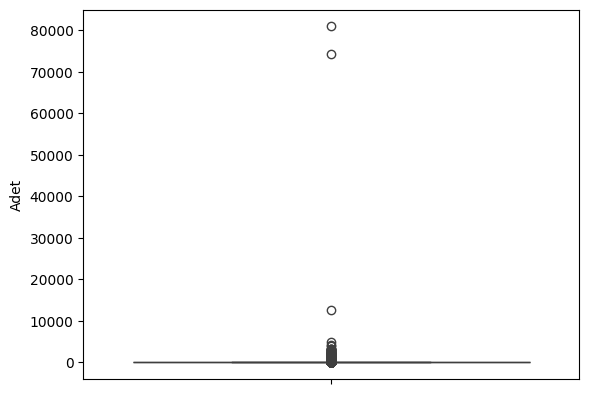

In [59]:
# Artık hatalı verimiz kalmadı tüm verilen bilgilere göre denetimleri gerçekleştirdik. Artık aykırı değerlere ilerleyebiliriz.
sns.boxplot(data=data2,y="Adet")
plt.show()
# Yukarıda bir kaç veride böyle durum görülmekte ama belki de rutin bir işlemdir. Belki de fiyat olarak çok küçük olduğu için 
# fazlaca rutin stok doldurma işlemini bu kaynaktan sağlayan bir müşteridir. Bu nokta da bunlar aykırı değerlerdir diyerek silmek. 
# gereksiz veri kaybına da yol açabilir eğer gelir ile alakalı bir işlem yapıyorsak mesela dağılımı olumsuz etkileyebiliriz. 
# bir nevi mevsimsel bir etki gibi hesaba katılabilir vs. vs. vs.

In [60]:
# daha önce tek değişken için olan hesaplama yntemini görmüştük bunu tekrar burada bir döngü şeklinde yapabiliriz
for i in ["Adet","Fiyat","Toplam Fiyat"]:
    Q1 = data2[i].quantile(0.25) # burada genel bir işlem yapıyoruz sektör vs. vs. etkileyebilir ama genel gittiğimiz için böyle alıyoruz
    Q3 = data2[i].quantile(0.75)

    IQR = Q3 - Q1

    altSınır = Q1 - 1.5 * IQR
    ustSınır = Q3 + 1.5 * IQR
    aykırı = data2[(data2[i] < altSınır) | (data2[i] > ustSınır)]
aykırılarIndeks = [j for j in aykırı.index]
data2.drop(data2.index[aykırılarIndeks],inplace=True)
data2.reset_index(drop=True,inplace=True)

print(len(data),len(data2),len(data)-len(data2),(1-(len(data2)/len(data)))*100)

541910 439779 102131 18.846487424111015


In [62]:
# Şimdi geriye tek kalan şey ölçeklendirme buradan sonrasında artık Makine öğrenmesi teknikleri ile neyi belirlemek istiyorsak ona göre 
# bir makine öğrenmesi algoritması seçerek onlarla ilgili çalışmalar yürütebiliriz. Ama onu şuan da burada yapmayacağız ilerleyen kısımlarda 
# doğrusal modellerle çalışabiliriz ama makine öğrenmesi algoritmaları için farklı bir kurs üzerinden gideceğiz.
#data2 = pd.get_dummies(data2["Ülke"],drop_first=True)
data2 = pd.get_dummies(data = data2, columns = ["Ülke"],drop_first=True)
print(data2.info())
data2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439779 entries, 0 to 439778
Data columns (total 44 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Fatura                     439779 non-null  object        
 1   Stok kodu                  439779 non-null  object        
 2   Ürün Adı                   439779 non-null  object        
 3   Adet                       439779 non-null  int64         
 4   Fatura Tarihi              439779 non-null  datetime64[ns]
 5   Fiyat                      439779 non-null  float64       
 6   Toplam Fiyat               439779 non-null  float64       
 7   Ülke_Austria               439779 non-null  bool          
 8   Ülke_Bahrain               439779 non-null  bool          
 9   Ülke_Belgium               439779 non-null  bool          
 10  Ülke_Brazil                439779 non-null  bool          
 11  Ülke_Canada                439779 non-null  bool    

,Fatura,Stok kodu,Ürün Adı,Adet,Fatura Tarihi,Fiyat,Toplam Fiyat,Ülke_Austria,Ülke_Bahrain,Ülke_Belgium,...,Ülke_RSA,Ülke_Saudi Arabia,Ülke_Singapore,Ülke_Spain,Ülke_Sweden,Ülke_Switzerland,Ülke_USA,Ülke_United Arab Emirates,Ülke_United Kingdom,Ülke_Unspecified
0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,15.30,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,25.50,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,11.10,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,11.10,False,False,False,...,False,False,False,False,False,False,False,False,True,False
